# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.094796e+01     7.796638e+00
 * time: 0.0018701553344726562
     1     3.076056e+01     5.950931e+00
 * time: 0.0075740814208984375
     2     2.196712e+01     6.886463e+00
 * time: 0.01406717300415039
     3     1.880007e+01     8.594385e+00
 * time: 0.02074909210205078
     4     1.372719e+01     4.717036e+00
 * time: 0.027714014053344727
     5     1.040883e+01     1.744940e+00
 * time: 0.03369021415710449
     6     9.240044e+00     1.491470e+00
 * time: 0.03864312171936035
     7     8.892646e+00     7.839210e-01
 * time: 0.04357123374938965
     8     8.678113e+00     7.712199e-01
 * time: 0.04951310157775879
     9     8.512148e+00     7.426117e-01
 * time: 0.055982112884521484
    10     8.388763e+00     6.742005e-01
 * time: 0.062351226806640625
    11     8.306482e+00     4.992492e-01
 * time: 0.11490917205810547
    12     8.279232e+00     7.337287e-01
 * time: 0.1176600456237793
    13     8.216199e+00     5.823695e-01
 *

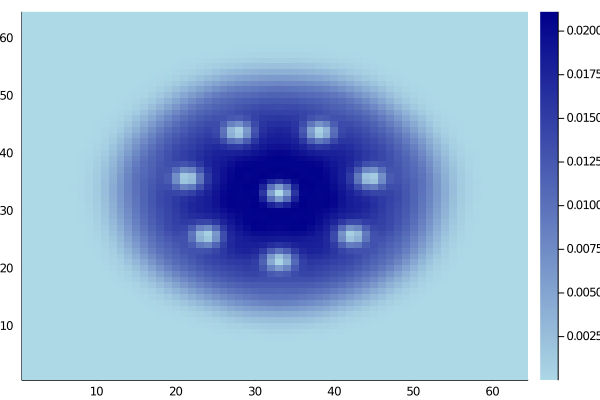

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)